In [1]:
!pip install keras
import keras

     |████████████████████████████████| 378kB 15.2MB/s eta 0:00:01
     |████████████████████████████████| 276kB 13.3MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=8f74c1f324f9ebdd5155219d197ca7138053cfac59b41c0dae0ea91a58f84bc0
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!unzip -o -q BoatOrCar.zip

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('DataBoatOrCar/training',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('DataBoatOrCar/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')   
from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [9]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [10]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 1000)

classifier.save("BoatOrCarModel.hdf5") # Hierarchical Data Format Fifth Version
print("Saved model to disk")

import pickle 
filehandler = open('history.pkl', 'wb') 
pickle.dump(history, filehandler)

Epoch 1/5
2000/2000 [==============================] - 1351s 676ms/step - loss: 0.0642 - accuracy: 0.9728 - val_loss: 1.1397 - val_accuracy: 0.8551
Epoch 2/5
2000/2000 [==============================] - 1348s 674ms/step - loss: 7.4446e-04 - accuracy: 0.9993 - val_loss: 2.1193 - val_accuracy: 0.8557
Epoch 3/5
2000/2000 [==============================] - 1358s 679ms/step - loss: 0.0181 - accuracy: 0.9936 - val_loss: 0.3384 - val_accuracy: 0.8173
Epoch 4/5
2000/2000 [==============================] - 1343s 671ms/step - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.1763 - val_accuracy: 0.8210
Epoch 5/5
2000/2000 [==============================] - 1345s 673ms/step - loss: 7.1588e-04 - accuracy: 0.9993 - val_loss: 3.0874 - val_accuracy: 0.8171
Saved model to disk


In [11]:
from keras.models import load_model
classifier = load_model('BoatOrCarModel.hdf5')

print(classifier.evaluate(training_set))

print(classifier.evaluate(test_set))

test_set.reset()
y_pred = classifier.predict_generator(test_set)
y_test = test_set.classes[test_set.index_array]
y_pred = ((y_pred>0.5)*1.0).flatten() 
print(sum(y_pred==y_test)/y_pred.size) 

!pip install sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

63/63 [==============================] - 33s 521ms/step
[2.1102204428302684e-09, 0.9994999766349792]
32/32 [==============================] - 16s 514ms/step
[8.795751571655273, 0.8169999718666077]
0.817
     |████████████████████████████████| 7.1MB 11.8MB/s eta 0:00:01
     |████████████████████████████████| 296kB 49.4MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=5b8b1f97b52c34315f48a0f5cad9ada17b6d25feb5d19427b55f9f2d3412dd77
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.
[[402  98]
 [ 85 415]]


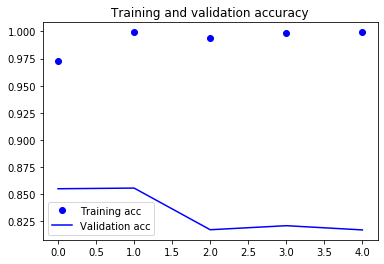

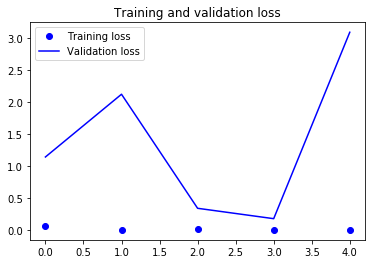

In [12]:
import pickle
with open('history.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()